In [1]:
# import settings and functions
%run ./../../imports.ipynb


Imports finished! :D


## What mesh?

Copy your choice to the next cell

for SquareTop:
```
analytical_solution_tag = "-ana_square_top"
generate_config = generateConfig_squareTop
generate_mesh = generateMesh_squareTop
```

for SquareSinCos:
```
analytical_solution_tag = "-ana_square_sincos"
generate_config = generateConfig_squareSinCos
generate_mesh = generateMesh_squareSinCos
```

for MexiHat
```
analytical_solution_tag = "-ana_mexi_hat"
generate_config = generateConfig_squareMexiHat
generate_mesh = generateMesh_squareMexiHat
```

for Lshape
```
analytical_solution_tag = "-ana_L_shape"
generate_config = generateConfig_Lshape
generate_mesh = generateMesh_Lshape
```

In [2]:
# Change according to instruction above
analytical_solution_tag = ""
generate_config = generateConfig_Lshape
generate_mesh = generateMesh_Lshape

# analytical_solution_tag = "-ana_mexi_hat"
# generate_config = generateConfig_squareMexiHat
# generate_mesh = generateMesh_squareMexiHat

# analytical_solution_tag = "-ana_square_top"
# generate_config = generateConfig_squareTop
# generate_mesh = generateMesh_squareTop

# analytical_solution_tag = "-ana_square_sincos"
# generate_config = generateConfig_squareSinCos
# generate_mesh = generateMesh_squareSinCos

## Analysis setup

In [9]:
# which executable?

exe = hdiv_data_driven_diffusion_snes
sumanalys = "sumanalys.csv"
ana_name = "ana_DD_brick"

ana_compare_exe = [hdiv_data_driven_diffusion_snes]
ana_compare_name = ["ana_DD_brick_mixed"]
ana_compare_sum = ["sumanalys.csv"]

# ana_compare_exe = [hdiv_diffusion, classic_diffusion]
# ana_compare_name = ["ana_brick_mixed", "ana_brick_classic"]
# ana_compare_sum = ["sumanalys.csv", "FEM_errors.csv"]

# Convergence analysis parameters
order_list = [1, 2, 3] # approximation order p
elem_size_list = [0.5, 0.2, 0.1, 0.05, 0.02] # element size h
# order_list = [1, 2, 3] # approximation order p
# elem_size_list = [0.5, 0.2, 0.1, 0.05] # element size h
params.triangle_mesh = True
params.nproc = 1 # number of processors
jumps = ""
if params.nproc == 1:
    jumps = "-get_jumps"
# jumps = "-get_jumps"

run_test = True
run_analysis = True
run_refinement_analysis = True
run_refinement_mesh_analysis = True
run_refinement_hp_analysis = True

# run_test = False
run_analysis = False
run_refinement_analysis = False
run_refinement_mesh_analysis = False
run_refinement_hp_analysis = False

naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
          "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter", "errorIndicatorGrad", "errorIndicatorDiv", "jumpL2", "jumpHdiv", "eleNum"]
# naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
#           "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter"]

error_name_list = ["L2norm", "H1seminorm", "fluxErr"]
error_label_list = [(r'Global error $L^2$-norm'),
               (r'Global error $H^1$-seminorm'), (r'Global Flux error')]

In [4]:
params.conductivity = 1.0 # linear conductivity
params.element_size = 0.2 # element size in the regular mesh
# params.element_size = elem_size_list[0] # element size in the regular mesh
params.order = 1 # approximation order for displacements

# params.triangle_mesh = False # use triangular mesh

# Pre-processing parameters
params.mesh_file = "L_shape"
params.length_x = 1
params.length_y = 1
params.length_z = 0
params.show_mesh = True


# solution parameters
params.log_file = "log" # log file name 


### New brick meshes

In [5]:
params.list_mesh_files = []
params.element_sizes = []

params.list_mesh_files.append("brick_20.cub")
params.element_sizes.append(5)

params.list_mesh_files.append("brick_15.cub")
params.element_sizes.append(4)

params.list_mesh_files.append("brick_10.cub")
params.element_sizes.append(3)

params.list_mesh_files.append("brick_7.cub")
params.element_sizes.append(2)

params.list_mesh_files.append("brick_6.cub")
params.element_sizes.append(1)

params.list_mesh_files.append("brick_4.cub")
params.element_sizes.append(1)

# which mesh to use
input_number = 3

In [6]:
h = params.element_sizes
cub_names = params.list_mesh_files
input_names = []
for i in cub_names:
    input_names.append(i[:-3]+"h5m")
count = len(h)
print(cub_names)
print(input_names)

['brick_20.cub', 'brick_15.cub', 'brick_10.cub', 'brick_7.cub', 'brick_6.cub', 'brick_4.cub']
['brick_20.h5m', 'brick_15.h5m', 'brick_10.h5m', 'brick_7.h5m', 'brick_6.h5m', 'brick_4.h5m']


In [ ]:
# %%capture
# partition the mesh
for i in range(count):
    # print(i)
    !{tools_dir}/mofem_part -my_file {cub_names[i]} -output_file {input_names[i]} -my_nparts 1 -dim 2 -adj_dim 1

## Run test

In [7]:
# start display for showing results
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()

In [ ]:
# # Testing mesh generation
# if run_test:
#     params.show_mesh = True
#     generate_config(params)
#     generate_mesh(params)

In [ ]:
# -csv_tree_file data_VGQ_generated_scaled.csv

params.csv_tree_file = "data_VGQ_generated_scaled.csv"

In [ ]:

# a = 134.0
# b = -0.1047
# c = 3.719 *10**(-5)

# nonlinear_a = a
# nonlinear_b = b
# nonlinear_c = c


# if run_test:
#     !rm out*
#     params.part_file = input_names[0]
#     !{diffusion_nonlinear_graphite} -file_name {params.part_file} -my_order 2 -nonlinear_a {nonlinear_a} -nonlinear_b {nonlinear_b} -nonlinear_c {nonlinear_c} -scaling 0
#     !convert.py out*

In [ ]:
# Testing running analysis


exe = hdiv_diffusion
# exe = classic_diffusion
# exe = data_driven_diffusion
# # exe = data_driven_diffusion_snes
exe = hdiv_data_driven_diffusion_snes
# exe = hdiv_data_driven_diffusion

if run_test:
    !rm out*
    params.part_file = input_names[3]
    # params.mesh_file = cub_names[0]
    # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    # !{mofem_part} -my_file {params.mesh_file} -nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} {jumps} -csv_tree_file {params.csv_tree_file} -scaling 1 -snes_max_it 5 -refinement_style 2 -ref_iter_num 1
    #  -use_line -data_dim 4 -my_dummy_k 100.0

    !convert.py out*


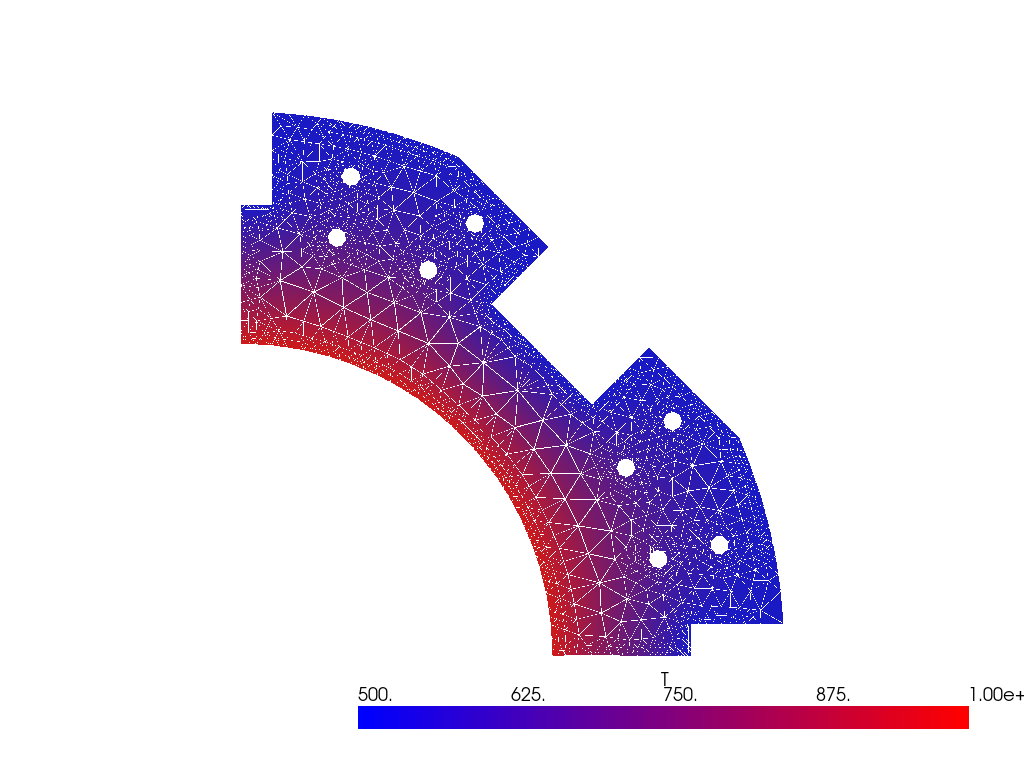

In [12]:
if run_test:
    params.show_file = "out_iteration_"
    params.show_file = "out_result_"
    params.show_field = "T"
    params.p_cmap = custom_cmap_temperature
    # params.show_file = "out_ori_result"
    # params.show_field = "P_reference"
    # params.warp_factor = 0.4  # warp factor
    params.show_edges = True
    params.p_save = "brick_quarter_T.pdf"
    show_results(params)
    # show_resulting_points(params)

In [ ]:
# if run_test:
#     params.show_file = "out_result"
#     params.show_field = "T"
#     # params.show_file = "out_ori_result"
#     # params.show_field = "P_reference"
#     # params.warp_factor = 0.4  # warp factor
#     # params.show_edges = True
#     # params.p_save = "run_test_p.pdf"
#     plot_gradients(params)

In [ ]:
if run_test:
    params.show_file = "out_result"
    params.show_field = "Q"
    params.warp_field_scalar = ""
    # params.warp_factor = 0.4  # warp factor
    params.show_edges = True
    # params.p_save = "run_test_q.pdf"
    show_results(params)
    params.show_field = "G"
    show_results(params)

In [ ]:
if run_test and jumps:
    params.show_file = "out_error"
    params.show_field = "JUMP_L2"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "c3_err_ind_jump.pdf"
    show_results(params)

In [ ]:
if run_test:
    params.show_file = "out_error"
    params.show_field = "ERROR_ESTIMATOR"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "c3_err_est.pdf"
    show_results(params)

In [ ]:
if run_test:
    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_DIV"
    params.show_edges = True
    params.warp_field_scalar = ""
    # params.warp_factor = 0.4  # warp factor
    # params.p_save = "run_test_err_ind_div.pdf"
    show_results(params)

In [ ]:
if run_test:
    params.show_file = "out_error_0"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.warp_field_scalar = ""
    # params.warp_factor = 0.4  # warp factor
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)
    params.show_file = "out_error"
    show_results(params)

## Comparison between standard and mixed

In [ ]:
if run_analysis:    
    for i in range(len(ana_compare_name)):
        !rm {ana_compare_sum[i]}
        !rm ./out_*
        for i in range(len(params.element_sizes)):
            # params.element_size = elem_size
            # params.show_mesh = False
            # generate_mesh(params)
            # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
            params.part_file = input_names[i]
            # !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
            for order in order_list:
                params.order = order
                # !mpirun -np {params.nproc} {ana_compare_exe[i]} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} {jumps}
                !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} {jumps} -csv_tree_file {params.csv_tree_file}
        !mv {sumanalys} ana_DD_mixed.csv
    


## Order refinement

In [ ]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_ord_name = "ana_L_mixed_order"

refinement_style = 1
ref_iter_num = 4
ref_control = 1.0
params.nproc = 1

if run_refinement_analysis:    
    !rm {sumanalys}
    !rm ./out_*
    params.part_file = input_names[input_number]
    order = order_list[1]
    
    # params.element_size = elem_size
    # params.show_mesh = True
    # generate_mesh(params)
    # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    # !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    # params.part_file= input_names[1]
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps}
    !mv {sumanalys} {ana_ref_ord_name}.csv

In [ ]:
!convert.py out*

if run_refinement_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    # params.p_cmap = "rainbow"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

## mesh refinement

In [ ]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_mesh_name = "ana_L_mixed_mesh"

if run_refinement_mesh_analysis:   
    refinement_style = 2
    ref_iter_num = 4
    ref_control = 1.0
    params.nproc = 1

    !rm {sumanalys}
    !rm ./out_*
    order = order_list[1]
    params.part_file = input_names[input_number]

    # params.element_size = elem_size
    # params.show_mesh = True
    # generate_mesh(params)
    # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    # !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps}
    !mv {sumanalys} {ana_ref_mesh_name}.csv

In [ ]:
!convert.py out*

if run_refinement_mesh_analysis:
    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [ ]:
if run_refinement_mesh_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

## hp refinement

In [ ]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_hp_name = "ana_L_mixed_hp"

if run_refinement_hp_analysis:   
    refinement_style = 3
    ref_iter_num = 4
    ref_control = 1.0
    params.nproc = 1

    !rm {sumanalys}
    !rm ./out_*
    order = order_list[1]
    params.part_file= input_names[input_number]

    # params.element_size = elem_size
    # params.show_mesh = True
    # generate_mesh(params)
    # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    # !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps}
    !mv {sumanalys} {ana_ref_hp_name}.csv

In [ ]:
!convert.py out*

if run_refinement_hp_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    # params.p_cmap = "rainbow"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [ ]:
if run_refinement_hp_analysis:
    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [ ]:
if run_refinement_hp_analysis:
    params.show_file = "out_error"
    params.show_field = "ERROR_ESTIMATOR"
    params.show_edges = True
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [ ]:
if run_refinement_hp_analysis:
    params.show_file = "out_result"
    params.show_field = "T"
    params.show_edges = True
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

### Load analysis

In [ ]:
print(naming)

In [ ]:
error_name_list = []
error_label_list = []

# error_name_list.append("L2norm")
# error_label_list.append(r'Global error $L^2$-norm')
# error_name_list.append("H1seminorm")
# error_label_list.append(r'Global error $H^1$-seminorm')
# error_name_list.append("fluxErr")
# error_label_list.append(r'Global Flux error')

error_name_list.append("rmsPoiErr")
error_label_list.append(r'Global error to material dataset')

error_name_list.append("errorEstimator")
error_label_list.append(r'Global error estimator')
error_name_list.append("errorIndicatorGrad")
error_label_list.append(r'Global error indicator grad')
error_name_list.append("errorIndicatorDiv")
error_label_list.append(r'Global error indicator div')

if jumps:
    error_name_list.append("jumpL2")
    error_label_list.append(r'Global jump L2')
    # error_name_list.append("jumpHdiv")
    # error_label_list.append(r'Global jump Hdiv')



In [ ]:
filename_prefix = "c3_mixed_L_"

mixed_ana = Analysis("ana_DD_mixed", naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='x', linestyle='--', plot_gradients=True, label="Mixed")
# classic_ana = Analysis(ana_compare_name[1], naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='o', linestyle='-', plot_gradients=False, label="Classic")


order_ref_ana = Analysis(ana_ref_ord_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='^', linestyle=':', plot_gradients=False, label="Order Refinement", color = 'black')

mesh_ref_ana = Analysis(ana_ref_mesh_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='v', linestyle=':', plot_gradients=False, label="Mesh Refinement", color = 'black')

hp_ref_ana = Analysis(ana_ref_hp_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='*', linestyle=':', plot_gradients=False, label="HP Refinement", color = 'red')

# ana_ref_ord_name

### Plot results

In [ ]:
# mixed_ana.plot_both_analyses_by_elem_size([classic_ana])
# mixed_ana.plot_both_analyses_by_elem_size([])
# mixed_ana.plot_both_analyses_by_gaussnum([classic_ana], [order_ref_ana, mesh_ref_ana])
mixed_ana.plot_both_analyses_by_gaussnum([])

In [ ]:
mixed_ana.plot_gradients = False
mixed_ana.legend_fond_size = 12

# mixed_ana.plot_both_analyses_by_gaussnum([classic_ana])
# mixed_ana.plot_both_analyses_by_elem_size([classic_ana])

# if run_refinement_analysis:
#     mixed_ana.filename_prefix = "c3_mixed_L_ref_order_"
#     mixed_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana])
# if run_refinement_mesh_analysis:
#     mixed_ana.filename_prefix = "c3_mixed_L_ref_mesh_"
#     mixed_ana.plot_both_analyses_by_gaussnum([], [mesh_ref_ana])
# if run_refinement_analysis and run_refinement_mesh_analysis:
mixed_ana.filename_prefix = "c3_mixed_L_ref_hp_"
mixed_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana, mesh_ref_ana, hp_ref_ana])

In [ ]:
!mkdir -p ./results
!mv *.pdf ./results
!mv *.svg ./results
!mv *.png ./results